## Plotting DGM inversion results

In [7]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#workdir='/home/jorge/Git_projs/VAE_SGD/'
workdir='/home/jorge/Documents/PhD_proj2/inversion/'
os.chdir(workdir)

In [9]:
# load test models
cslist = ['mc1','mc2','mc3','mv1','mv2','mv3']
truthlist = []

for ky in cslist:
    truthlist.append(np.load(Path('test_models/{}.npy'.format(ky))))

### Linear forward model:

In [10]:
# load inversion without noise.
cs = 'mc2'
sdir = 'Results_linear'
caslist = ['VSnnn','VSbnn','VSbod','VSbrd','SAnnn','SSbnd']
mlist = []
elist = []
dlist = []
zlist = []

for ky in caslist:
    mlist.append(np.load(Path('{}/modsmin_{}_{}.npy'.format(sdir,ky,cs))))
    elist.append(np.load(Path('{}/mRMSEs_{}_{}.npy'.format(sdir,ky,cs))))
    dlist.append(np.load(Path('{}/dRMSEs_{}_{}.npy'.format(sdir,ky,cs))))
    zlist.append(np.load(Path('{}/zs_{}_{}.npy'.format(sdir,ky,cs))))

In [11]:
# threshold list for linear forward model.
tlist = [0.606,0.998,1.096,0.524,0.958,0.734]
# model RMSE list for linear forward model.
telist = [0.104,0.147,0.173,0.057,0.098,0.085]

In [12]:
# case label list
lablist = [r'mc$\mathregular{_1}$',r'mc$\mathregular{_2}$',r'mc$\mathregular{_3}$',
           r'mv$\mathregular{_1}$',r'mv$\mathregular{_2}$',r'mv$\mathregular{_3}$']

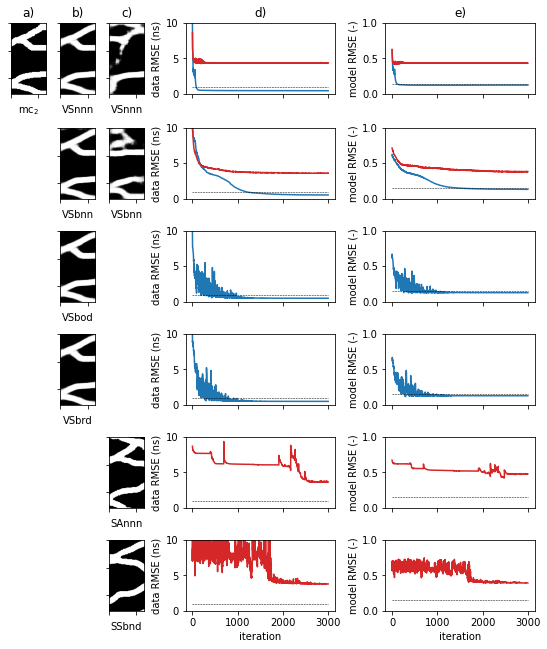

In [13]:
# Plot dRMSE vs iterations for one model.
ma = 4
mj = 7
mk = 3

# joint subplot
fig = plt.figure(figsize=(7.48,8.90), constrained_layout=True)
grid = fig.add_gridspec(12,7)

for j,d in enumerate(dlist):
    mr = 0
    if j==0: mr = mj
    elif j==1: mr = mk
    else: mr = ma
    dcostacc = d[ma]
    dcostrej = d[mr]
    mcostacc = elist[j][ma,:]
    mcostrej = elist[j][mr,:]
    
    # Get znorms vs. iterations
    #znorms = np.zeros(len(zlist[j][0]))
    #for i in range(len(znorms)):
    #    znorms[i] = np.linalg.norm(zlist[j][mi][i][:][0])

    # first column
    if j ==0:
        ax = fig.add_subplot(grid[2*j:2*j+2,0])
        ax.imshow(truthlist[1], cmap='Greys_r')
        ax.set_title('a)')
        ax.set_xlabel(lablist[1])
        ax.set_yticklabels('')
        ax.set_xticklabels('')
    
    # second column
    if j<4:    
        ax = fig.add_subplot(grid[2*j:2*j+2,1])
        ax.imshow(mlist[j][ma], cmap='Greys_r')
        if j==0:
            ax.set_title('b)')
        ax.set_xlabel(caslist[j])
        ax.set_yticklabels('')
        ax.set_xticklabels('')
    
    # third column
    if j not in (2,3):
        ax = fig.add_subplot(grid[2*j:2*j+2,2])
        ax.imshow(mlist[j][mr], cmap='Greys_r')
        if j==0:
            ax.set_title('c)')
        ax.set_xlabel(caslist[j])
        ax.set_yticklabels('')
        ax.set_xticklabels('')

    # fourth column
    ax = fig.add_subplot(grid[2*j:2*j+2,3:5])
    if j<4:
        ax.plot(dcostacc, c='tab:blue')
    if j not in (2,3):
        ax.plot(dcostrej, c='tab:red')
    hl = np.linspace(0,3001,10)
    th = np.ones(hl.shape)*tlist[1]
    ax.plot(hl,th,'k--',linewidth=0.5)
    ax.set_ylim((0.0,10.0))
    ax.set_ylabel('data RMSE (ns)')
    if j==0:
        ax.set_title('d)')
    if j != len(dlist)-1:
        ax.set_xticklabels('')
    else:
        ax.set_xlabel('iteration')
        
    # fifth column
    ax = fig.add_subplot(grid[2*j:2*j+2,5:])
    if j<4:
        ax.plot(mcostacc, c='tab:blue')
    if j not in (2,3):
        ax.plot(mcostrej, c='tab:red')
    hl = np.linspace(0,3001,10)
    th = np.ones(hl.shape)*telist[1]
    ax.plot(hl,th,'k--',linewidth=0.5)
    ax.set_ylim((0.0,1.0))
    ax.set_ylabel('model RMSE (-)')
    if j==0:
        ax.set_title('e)')
    if j != len(dlist)-1:
        ax.set_xticklabels('')
    else:
        ax.set_xlabel('iteration')

In [14]:
fig.savefig('DGMs_inv.svg', dpi=300)

In [15]:
fig.savefig('DGMs_inv.pdf', dpi=300)

In [16]:
# load inversions without noise
cas = 'VSbrd'
cslist = ['mc1','mc2','mc3','mv1','mv2','mv3']
mlist = []
dlist = []
zlist = []

for ky in cslist:
    mlist.append(np.load(Path('{}/modsmin_{}_{}.npy'.format(sdir,cas,ky))))
    dlist.append(np.load(Path('{}/dRMSEs_{}_{}.npy'.format(sdir,cas,ky))))
    zlist.append(np.load(Path('{}/zs_{}_{}.npy'.format(sdir,cas,ky))))

In [17]:
# load inversions with noise.
sdir = 'Results_linear_noise'
n_mlist = []
n_dlist = []
n_zlist = []

for ky in cslist:
    n_mlist.append(np.load(Path('{}/modsmin_{}_{}.npy'.format(sdir,cas,ky))))
    n_dlist.append(np.load(Path('{}/dRMSEs_{}_{}.npy'.format(sdir,cas,ky))))
    n_zlist.append(np.load(Path('{}/zs_{}_{}.npy'.format(sdir,cas,ky))))

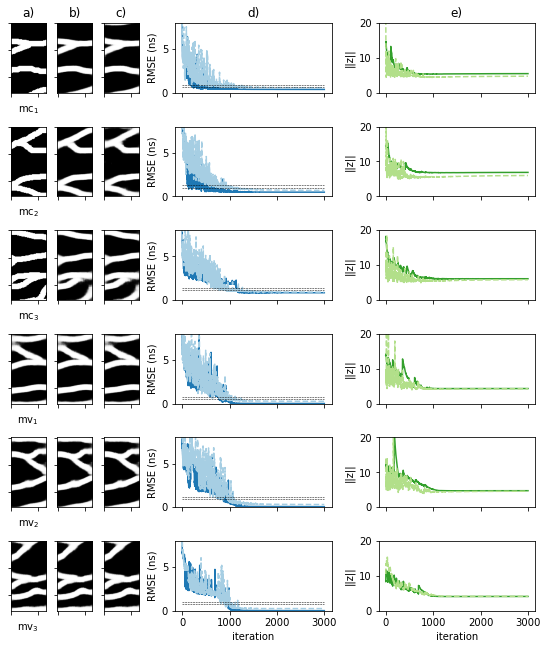

In [18]:
# Plot dRMSE vs iterations for one model.
mi = 0

# joint subplot
fig = plt.figure(figsize=(7.48,8.90), constrained_layout=True)
grid = fig.add_gridspec(12,7)

for j,d in enumerate(dlist):
    dcost = d[mi]
    n_dcost = n_dlist[j][mi,:]
    
    # Get znorms vs. iterations
    znorms = np.zeros(len(zlist[j][0]))
    n_znorms = np.zeros(len(zlist[j][0]))
    for i in range(len(znorms)):
        znorms[i] = np.linalg.norm(zlist[j][mi][i][:][0])
        n_znorms[i] = np.linalg.norm(n_zlist[j][mi][i][:][0])

    # first column
    ax = fig.add_subplot(grid[2*j:2*j+2,0])
    ax.imshow(truthlist[j], cmap='Greys_r')
    if j ==0:
        ax.set_title('a)')
    ax.set_xlabel(lablist[j])
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    
    # second column
    ax = fig.add_subplot(grid[2*j:2*j+2,1])
    ax.imshow(mlist[j][mi], cmap='Greys_r')
    if j ==0:
        ax.set_title('b)')
    #ax.set_xlabel(lablist[j])
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    
    # third column
    ax = fig.add_subplot(grid[2*j:2*j+2,2])
    ax.imshow(n_mlist[j][mi], cmap='Greys_r')
    if j ==0:
        ax.set_title('c)')
    #ax.set_xlabel(lablist[j])
    ax.set_yticklabels('')
    ax.set_xticklabels('')

    # fourth column
    ax = fig.add_subplot(grid[2*j:2*j+2,3:5])
    ax.plot(dcost, c=plt.cm.Paired(1))
    ax.plot(n_dcost, c=plt.cm.Paired(0),linestyle='--')
    hl = np.linspace(0,3001,10)
    th = np.ones(hl.shape)*tlist[j]
    ax.plot(hl,th,'k--',linewidth=0.5)
    thn = np.ones(hl.shape)*(tlist[j]+0.25)
    ax.plot(hl,thn,'k--',linewidth=0.5)
    if j ==0:
        ax.set_title('d)')
    ax.set_ylim((0.0,8.0))
    ax.set_ylabel('RMSE (ns)')
    if j == len(dlist)-1:
        ax.set_xlabel('iteration')
    else:
        ax.set_xticklabels('')

    # fifth column
    ax = fig.add_subplot(grid[2*j:2*j+2,5:])
    ax.plot(znorms,c=plt.cm.Paired(3))
    ax.plot(n_znorms,c=plt.cm.Paired(2),linestyle='--')
    ax.set_ylim((0.0,20.0))
    ax.set_ylabel('||z||')
    if j ==0:
        ax.set_title('e)')
    if j == len(dlist)-1:
        ax.set_xlabel('iteration')
    else:
        ax.set_xticklabels('')

In [19]:
fig.savefig('VSbrd_inv.svg', dpi=300)

In [20]:
fig.savefig('VSbrd_inv.pdf', dpi=300)

### Nonlinear forward model

In [63]:
# load inversions without noise
cas = 'VSbrd'
sdir = 'Results_nonlinear'
cslist = ['mc1','mc2','mc3','mv1','mv2','mv3']
mlist = []
dlist = []
zlist = []

for ky in cslist:
    mlist.append(np.load(Path('{}/modsmin_{}_{}.npy'.format(sdir,cas,ky))))
    dlist.append(np.load(Path('{}/dRMSEs_{}_{}.npy'.format(sdir,cas,ky))))
    zlist.append(np.load(Path('{}/zs_{}_{}.npy'.format(sdir,cas,ky))))

In [64]:
# load inversions with noise.
sdir = 'Results_nonlinear_noise'
n_mlist = []
n_dlist = []
n_zlist = []

for ky in cslist:
    n_mlist.append(np.load(Path('{}/modsmin_{}_{}.npy'.format(sdir,cas,ky))))
    n_dlist.append(np.load(Path('{}/dRMSEs_{}_{}.npy'.format(sdir,cas,ky))))
    n_zlist.append(np.load(Path('{}/zs_{}_{}.npy'.format(sdir,cas,ky))))

In [65]:
# threshold list for nonlinear forward model.
tlist = [0.447,0.882,0.899,0.387,0.562,0.480]

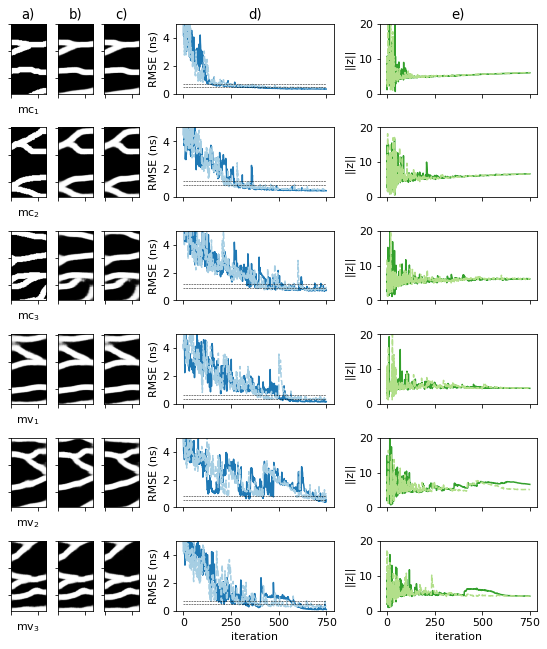

In [67]:
# Plot dRMSE vs iterations for one model.
mi = 0

# joint subplot
fig = plt.figure(figsize=(7.48,8.90), constrained_layout=True)
grid = fig.add_gridspec(12,7)

for j,d in enumerate(dlist):
    dcost = d[mi]
    n_dcost = n_dlist[j][mi,:]
    
    # Get znorms vs. iterations
    znorms = np.zeros(len(zlist[j][0]))
    n_znorms = np.zeros(len(zlist[j][0]))
    for i in range(len(znorms)):
        znorms[i] = np.linalg.norm(zlist[j][mi][i][:][0])
        n_znorms[i] = np.linalg.norm(n_zlist[j][mi][i][:][0])

    # first column
    ax = fig.add_subplot(grid[2*j:2*j+2,0])
    ax.imshow(truthlist[j], cmap='Greys_r')
    if j ==0:
        ax.set_title('a)')
    ax.set_xlabel(lablist[j])
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    
    # second column
    ax = fig.add_subplot(grid[2*j:2*j+2,1])
    ax.imshow(mlist[j][mi], cmap='Greys_r')
    if j ==0:
        ax.set_title('b)')
    #ax.set_xlabel(lablist[j])
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    
    # third column
    ax = fig.add_subplot(grid[2*j:2*j+2,2])
    ax.imshow(n_mlist[j][mi], cmap='Greys_r')
    if j ==0:
        ax.set_title('c)')
    #ax.set_xlabel(lablist[j])
    ax.set_yticklabels('')
    ax.set_xticklabels('')

    # fourth column
    ax = fig.add_subplot(grid[2*j:2*j+2,3:5])
    ax.plot(dcost, c=plt.cm.Paired(1))
    ax.plot(n_dcost, c=plt.cm.Paired(0),linestyle='--')
    hl = np.linspace(0,3001,10)
    th = np.ones(hl.shape)*tlist[j]
    ax.plot(hl,th,'k--',linewidth=0.5)
    thn = np.ones(hl.shape)*(tlist[j]+0.25)
    ax.plot(hl,thn,'k--',linewidth=0.5)
    if j ==0:
        ax.set_title('d)')
    ax.set_ylim((0.0,8.0))
    ax.set_ylabel('RMSE (ns)')
    if j == len(dlist)-1:
        ax.set_xlabel('iteration')
    else:
        ax.set_xticklabels('')

    # fifth column
    ax = fig.add_subplot(grid[2*j:2*j+2,5:])
    ax.plot(znorms,c=plt.cm.Paired(3))
    ax.plot(n_znorms,c=plt.cm.Paired(2),linestyle='--')
    ax.set_ylim((0.0,20.0))
    ax.set_ylabel('||z||')
    if j ==0:
        ax.set_title('e)')
    if j == len(dlist)-1:
        ax.set_xlabel('iteration')
    else:
        ax.set_xticklabels('')

In [68]:
fig.savefig('VSbrd_inv_nonlinear.svg', dpi=300)

In [69]:
fig.savefig('VSbrd_inv_nonlinear.pdf', dpi=300)